# LoL Exploratory Data Analysis

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Filling missing position with the only remaining role

df = pd.read_csv('matches_data.csv')
df['teamPosition'] = df['teamPosition'].replace({'UTILITY':'SUPPORT'})

all_roles = ['TOP', 'JUNGLE', 'MIDDLE', 'BOTTOM', 'SUPPORT']

def fill_missing_teamPos(df: pd.DataFrame):
    games_with_null_pos = df.loc[~df['teamPosition'].isin(all_roles), ['matchId', 'summonerId', 'teamId']]
    
    for index, row in games_with_null_pos.iterrows():
        game = df[df['matchId'] == row['matchId']]
        set_of_team_pos = set(game.loc[game['teamId']==row['teamId'], 'teamPosition'])
        missing_pos = (set(all_roles) - set_of_team_pos).pop()
        row_test = row
        df.loc[(df['matchId']==row['matchId']) & (df['summonerId']==row['summonerId']), 'teamPosition'] = missing_pos

    return df

df = fill_missing_teamPos(df)

In [32]:
key_word = ''
for index, column in enumerate(df.columns):
    if key_word in column:
        print(f'{index:3} : {column}')

  0 : matchId
  1 : summonerId
  2 : championName
  3 : teamId
  4 : teamPosition
  5 : kills
  6 : assists
  7 : deaths
  8 : goldEarned
  9 : baronKills
 10 : bountyLevel
 11 : champExperience
 12 : champLevel
 13 : championId
 14 : championTransform
 15 : consumablesPurchased
 16 : damageDealtToBuildings
 17 : damageDealtToObjectives
 18 : damageDealtToTurrets
 19 : damageSelfMitigated
 20 : detectorWardsPlaced
 21 : doubleKills
 22 : dragonKills
 23 : firstBloodAssist
 24 : firstBloodKill
 25 : firstTowerAssist
 26 : firstTowerKill
 27 : gameEndedInEarlySurrender
 28 : gameEndedInSurrender
 29 : goldSpent
 30 : individualPosition
 31 : inhibitorKills
 32 : inhibitorTakedowns
 33 : inhibitorsLost
 34 : item0
 35 : item1
 36 : item2
 37 : item3
 38 : item4
 39 : item5
 40 : item6
 41 : itemsPurchased
 42 : killingSprees
 43 : lane
 44 : largestCriticalStrike
 45 : largestKillingSpree
 46 : largestMultiKill
 47 : longestTimeSpentLiving
 48 : magicDamageDealt
 49 : magicDamageDealtToCh

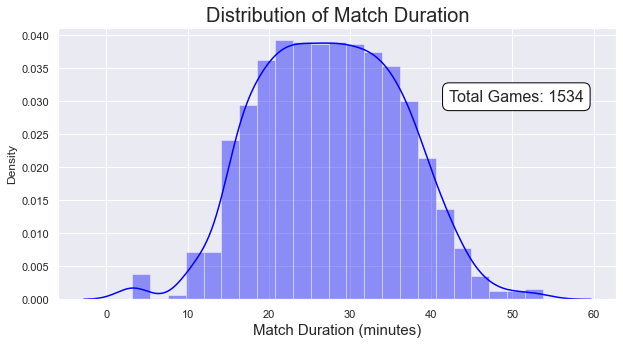

In [264]:
from scipy.stats import norm
games_count = len(df['game_duration'].unique()) 

sns.set_theme()
plt.figure(figsize=(10,5))
g = sns.distplot(df['game_duration'].unique()/60, color='blue', fit=None)
((x0, y0), (x1, y1)) = g.patches[int(len(g.patches)/1.5)].get_bbox().get_points()

plt.title('Distribution of Match Duration', fontsize=20)
plt.xlabel('Match Duration (minutes)', fontsize=15)
plt.text(x1*1.1, y1, f'Total Games: {games_count}', fontsize=16,
         bbox=dict(boxstyle="round, pad=0.4", fc="white", ec="black", lw=1))
plt.show()

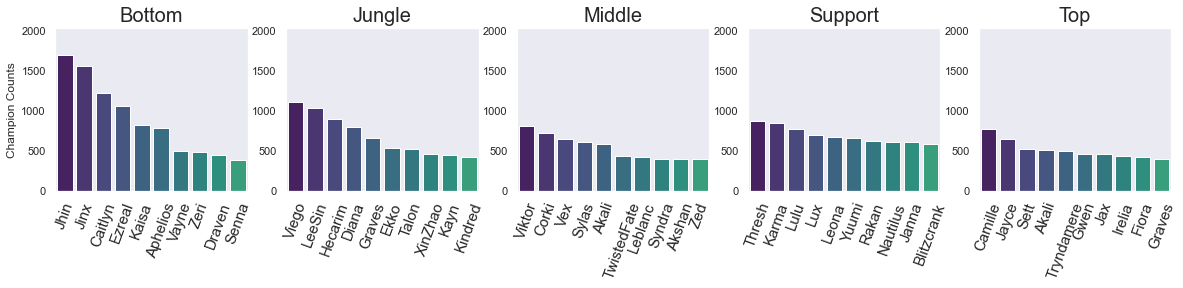

In [152]:
# Plot champion popularity by roles

data = df.groupby(['teamPosition', 'championName'])['matchId'].count()
data = data.reset_index().groupby('teamPosition')[['championName','matchId']].apply(lambda x: x.nlargest(10, 'matchId'))

fig, ax = plt.subplots(1,5, figsize=(20,3))
sns.set_style('dark')
for index, role in enumerate(data.index.get_level_values(0).drop_duplicates()):
    sns.barplot(x=data.loc[role]['championName'],
                y=data.loc[role]['matchId'],
                ax=ax[index],
                palette=sns.color_palette("viridis", 15)
               )
    ax[index].tick_params(axis='x', rotation=70, labelsize=15)
    ax[index].set_ylabel('')
    ax[index].set_xlabel('', )
    ax[index].set_ylim(0, data['matchId'].max()*1.2)
    ax[index].set_title(role.capitalize(), loc='center', fontsize=20)
    
ax[0].set_ylabel('Champion Counts')
plt.show()

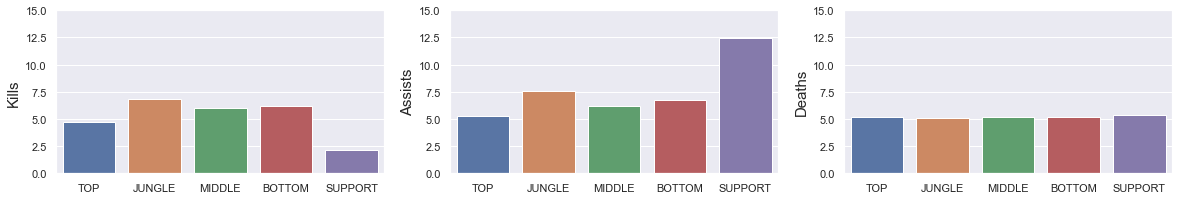

In [31]:
sns.set_theme()

fig, ax = plt.subplots(1,3, figsize=(20,3))
sns.set_style('dark')

attributes = ['kills', 'assists', 'deaths']
for index, attribute in enumerate(attributes):
    sns.barplot(x='teamPosition',
                y=attribute,
                data=df,
                estimator=np.mean,
                ax=ax[index],
                ci=None,
               )
    ax[index].set_ylabel(attribute.capitalize(), fontsize=15)
    ax[index].set_xlabel('')
    ax[index].set_ylim(0, 15)
    
plt.show()

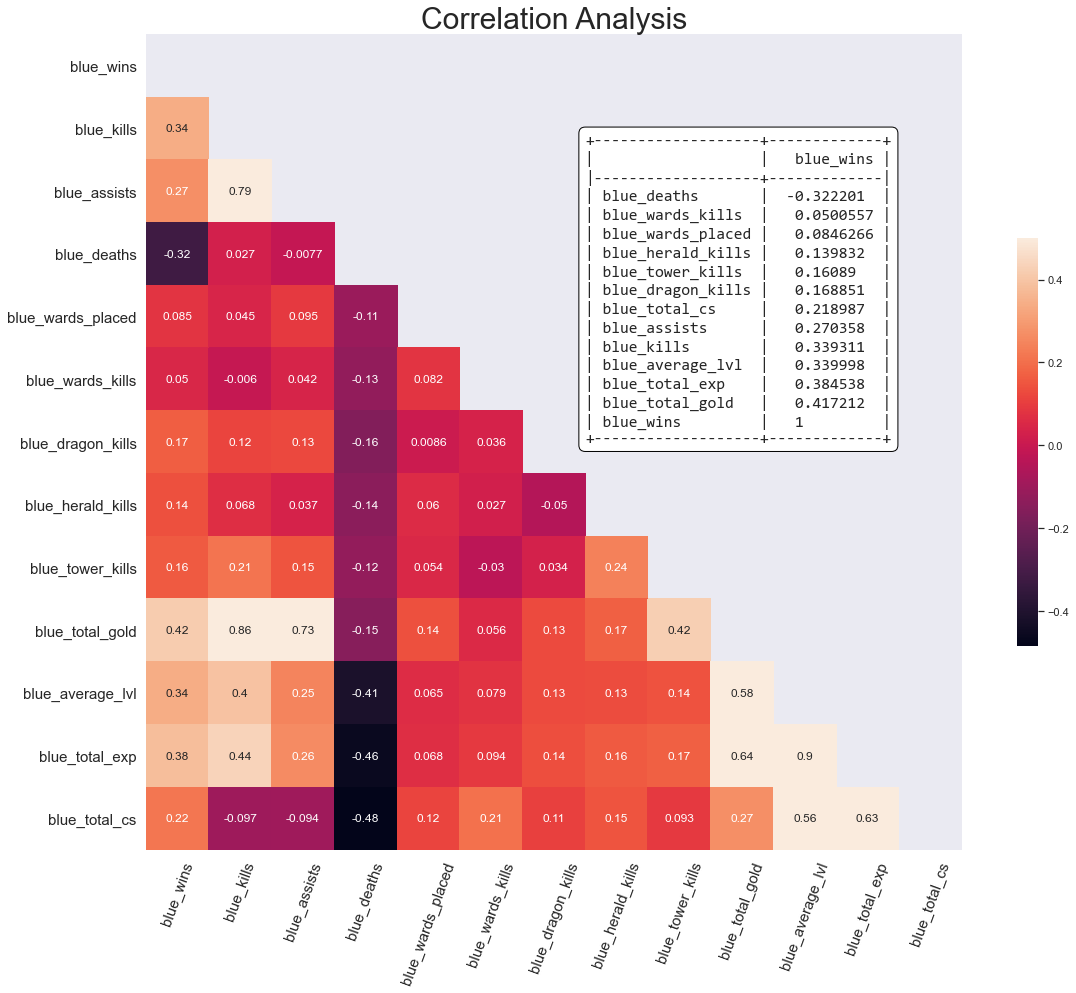

In [88]:
data = pd.read_csv('10mins_stats.csv')

corr = data[data.columns[:14]].drop(['blue_inhibitor_kills'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(20,15))
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=None, vmax=0.5, square=True, annot=True, cbar_kws={'shrink':.5}, ax=ax)
ax.tick_params(axis='x', rotation=70, labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_title('Correlation Analysis', fontsize=30)

text = tabulate(corr['blue_wins'].sort_values().to_frame(), headers='keys', tablefmt='psql')
plt.text(7, 6.5, text,
         fontsize=16,
         bbox=dict(boxstyle="round, pad=0.4", fc="white", ec="black", lw=1),
         **{'fontname':'Consolas'}
         
        )
plt.show()